In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv('transaction_fraud/PS_20174392719_1491204439457_log.csv')
df1.shape

(6362620, 11)

In [4]:
df1.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [5]:
df1.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

# Data Exploration

In [6]:
#check for null data
df1.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
df1['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

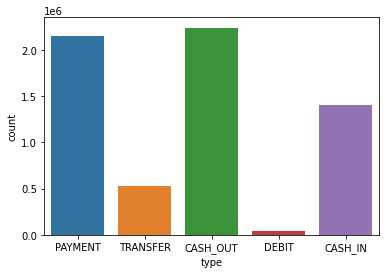

In [9]:
sn.countplot(x='type', data= df1)

### Cash out the most common type of payment

### How much fraud is there?

In [10]:
df1['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

<AxesSubplot:xlabel='isFraud', ylabel='count'>

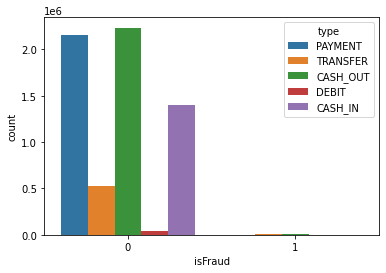

In [11]:
sn.countplot(x='isFraud', data=df1, hue= 'type')

## What is the most profitable type of fraud?

In [12]:
df1.groupby('type').mean()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
type,,,,,,,,
CASH_IN,244.490093,168920.242004,3.590464e+06,3.759379e+06,1.587919e+06,1.467105e+06,0.000000,0.00000
CASH_OUT,240.900735,176273.964346,4.602380e+04,1.747419e+04,1.497758e+06,1.691326e+06,0.001840,0.00000
DEBIT,248.440481,5483.665314,6.864734e+04,6.516165e+04,1.493136e+06,1.513003e+06,0.000000,0.00000
PAYMENT,244.378179,13057.604660,6.821683e+04,6.183789e+04,0.000000e+00,0.000000e+00,0.000000,0.00000
TRANSFER,246.657304,910647.009645,5.444185e+04,1.028816e+04,2.567606e+06,3.554567e+06,0.007688,0.00003


<AxesSubplot:xlabel='type', ylabel='amount'>

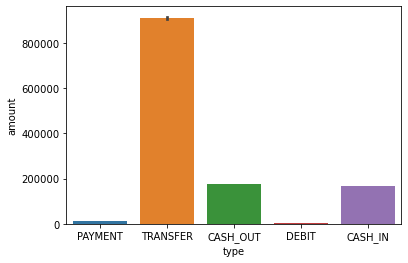

In [13]:
sn.barplot(x='type',y ='amount', data =df1)

## Cash out is most common but transfer is most profitable.

Drop useless columns

In [14]:
df2 = df1.drop(['nameDest','nameOrig'], axis=1)

In [15]:
dummies = pd.get_dummies(df2.type,drop_first=True)

In [16]:
df3 = pd.concat([df2, dummies], axis=1)

In [17]:
df3.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


In [18]:
df4 = df3.drop('type', axis=1)

 ## Split data into training and test data

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df4.drop('isFraud', axis=1)
y = df4['isFraud']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

## Check if X and y are balanced

In [22]:
y_train.value_counts()

0    4448040
1       5794
Name: isFraud, dtype: int64

## We have a extremely unbalanced dataset, so we will generate synthetic data using smote.

In [23]:
from imblearn.over_sampling import SMOTE

In [24]:
os = SMOTE()

In [25]:
X_train_resample, y_train_resample =os.fit_resample(X_train,y_train)

In [26]:
y_train_resample.value_counts()

0    4448040
1    4448040
Name: isFraud, dtype: int64

## We now have a balanced dataset.

# What is the best ml model to use? We can try a few and pick the best one then optimize that model.

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [65]:
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

In [66]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [0,.5,1],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        },
        'random_forest' : {
            'model' : RandomForestClassifier(),
            'params' : {
                'n_estimators': [50],
            }
        },
        'logistic_regression' :{
            'model' : LogisticRegression(),
            'params' : {

            }
        }
    }
    scores = []
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False, n_jobs=-1)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [ ]:
find_best_model_using_gridsearchcv(X_train_resample,y_train_resample)

C:\Users\shane\anaconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_base.py:148: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  warnings.warn(


![results](results.jpg)

In [ ]:
rf_clf = GridSearchCV(RandomForestClassifier(),{
    'n_estimators':[100],'n_jobs':[-1],'criterion':['gini','entropy'],'max_features' :['sqrt','log2']}, cv=cv, return_train_score=False )
rf_clf.fit(X_train_resample,y_train_resample)

In [ ]:
rf_clf.best_params_

![best_params](best_params.jpg)

In [ ]:
rf_clf.best_score_

In [ ]:
y_pred =rf_clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
cm = confusion_matrix(y_test, y_pred,)
cm

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

![classification_report](class_report.jpg)

# we predict no fraud perfectly but our precision is only 65% for predicting fraud
# we can hypertune the parameters for random forest to get a better precision

In [ ]:
# rf_clf2 =GridSearchCV(RandomForestClassifier(),{
#     'n_estimators':[300], 'criterion':['entropy'],'n_jobs':[-1],'max_features':['log2']}, cv=cv,return_train_score=True)
#

In [ ]:
# rf_clf2.fit(X_train_resample,y_train_resample)

In [ ]:
# f = pd.Series(rf_clf2.best_estimator_.feature_importances_, index=rf_clf2.feature_names_in_)
# f.sort_values(ascending=False)

## After hyper tuning I still get low precision. The code takes forever to run with so many trees, so it's commented out
# I learned about Gradient boosting so i will try this

In [35]:
from sklearn.ensemble import  GradientBoostingClassifier

In [36]:
reg = GradientBoostingClassifier(random_state=0)
reg.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [54]:
y_pred_xgb = reg.predict(X_test)

In [55]:
reg.score(X_test,y_test)

0.9996259402573154

In [56]:
from sklearn.metrics import confusion_matrix

In [57]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb,)
cm_xgb

array([[1906247,     120],
       [    594,    1825]], dtype=int64)

In [58]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906367
           1       0.94      0.75      0.84      2419

    accuracy                           1.00   1908786
   macro avg       0.97      0.88      0.92   1908786
weighted avg       1.00      1.00      1.00   1908786



In [64]:
best_feat = pd.Series(reg.feature_importances_,index=reg.feature_names_in_).sort_values(ascending=False)
best_feat

newbalanceOrig    0.266247
oldbalanceOrg     0.226557
newbalanceDest    0.223413
amount            0.219808
step              0.044658
CASH_OUT          0.011462
TRANSFER          0.005585
oldbalanceDest    0.001134
PAYMENT           0.000851
isFlaggedFraud    0.000284
DEBIT             0.000000
dtype: float64

# We successfully got a better result with a precision of prediction fraud at 94 %
# Our best features are new and old balance
# Debit doesn't contribute to fraud